In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Train.csv")
dataset.head()

,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity
0,26/09/24,Automotive,BrandA,3,0,17.9,462.30,33.96,359.45,227.0
1,26/09/24,Automotive,BrandA,3,0,66.3,321.28,24.76,49.47,370.0
2,26/09/24,Automotive,BrandA,3,0,14.4,74.85,32.19,245.11,299.0
3,26/09/24,Automotive,BrandA,3,0,34.7,469.12,43.68,144.08,426.0
4,22/09/24,Automotive,BrandA,6,1,93.5,221.76,36.79,478.07,470.0


In [3]:
dataset.describe()

,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity
count,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18019.000000
mean,2.991235,0.142022,52.329465,275.111184,27.490937,259.858758,255.665631
std,2.000765,0.349083,27.410577,129.733609,13.022521,126.653165,141.179795
min,0.000000,0.000000,5.000000,50.070000,5.000000,40.070000,10.000000
25%,1.000000,0.000000,28.900000,163.315000,16.265000,149.530000,133.500000
50%,3.000000,0.000000,52.500000,275.150000,27.600000,260.260000,257.000000
75%,5.000000,0.000000,75.700000,387.650000,38.690000,368.520000,377.000000
max,6.000000,1.000000,100.000000,499.900000,49.990000,479.990000,499.000000


In [4]:
dataset.isnull().sum()/dataset.shape[0]*100

Date                    0.000000
Category                0.000000
Brand                   0.000000
Day_of_Week             0.000000
Holiday_Indicator       0.000000
Past_Purchase_Trends    0.000000
Price                   0.000000
Discount                0.000000
Competitor_Price        0.000000
Sales_Quantity          2.510415
dtype: float64

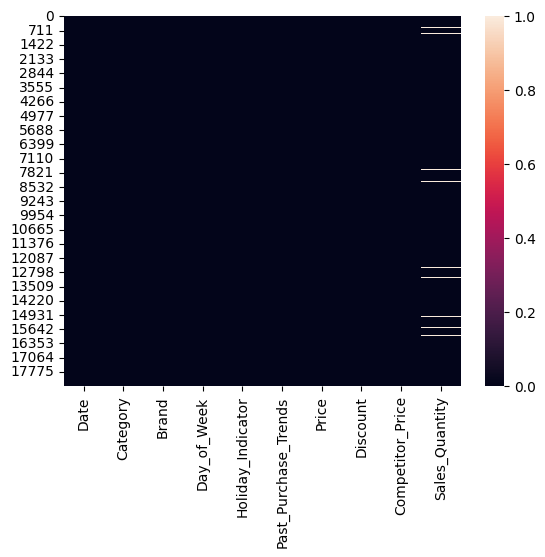

In [5]:
sns.heatmap(dataset.isnull())
plt.show()

In [6]:
#forward filling
#dataset.ffill(inplace=True)

In [7]:
#backward filling
#dataset.bfill(inplace=True)

In [8]:
#fill meaningfull data using sklearn
from sklearn.impute import SimpleImputer

In [9]:
si = SimpleImputer(strategy="mean")
ar = si.fit_transform(dataset[["Sales_Quantity"]])

In [10]:
new_dataset = pd.DataFrame(ar, columns=["Sales_Quantity"])
new_dataset

,Sales_Quantity
0,227.0
1,370.0
2,299.0
3,426.0
4,470.0
...,...
18478,359.0
18479,333.0
18480,132.0
18481,274.0


In [11]:
new_dataset.isnull().sum()

Sales_Quantity    0
dtype: int64

In [12]:
dataset[['Sales_Quantity']] = si.fit_transform(dataset[['Sales_Quantity']])

In [13]:
dataset.isnull().sum()

Date                    0
Category                0
Brand                   0
Day_of_Week             0
Holiday_Indicator       0
Past_Purchase_Trends    0
Price                   0
Discount                0
Competitor_Price        0
Sales_Quantity          0
dtype: int64